# Iterative Methods for Sparse Linear Systems

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

## 4.1 Jacobi and Gauss–Seidel

$$
\dfrac{1}{h^2}(u_{i-1,j} + u_{i+1,j} + u_{i,j-1} + u_{i,j+1} - 4u_{ij}) = f_{ij}
$$
$$
u_{ij} = \dfrac{1}{4}(u_{i-1,j} + u_{i+1,j} + u_{i,j-1} + u_{i,j+1}) -\dfrac{h^2}{4}f_{ij}
$$

In [ ]:
# This is the Jacobi iteration for the Poisson problem

m = 7
U = np.zeros([m+2, m+2])
h = 1/(m+1)
F = np.zeros([m+2, m+2])

conv_ker = np.array([
    [0, 1, 0],
    [1, 0, 1],
    [0, 1, 0],
])/4

epochs = 10

for _ in range(epochs):
    U[1:-1, 1:-1] = signal.convolve2d(U, conv_ker, mode='valid') - h**2/4*F[1:-1, 1:-1]
# or
for _ in range(epochs):
    U[1:-1, 1:-1] = 1/4*(U[:-2, 1:-1] + U[2:, 1:-1] + U[1:-1, :-2] + U[1:-1, 2:] - h**2*F[1:-1, 1:-1])

In [ ]:
# This is what is known as the Gauss–Seidel method, and it would be a lucky coding error since this method generally converges about twice as fast as Jacobi does.

for _ in range(epochs):
    for j in range(1, m+1):
        for i in range(1, m+1):
            U[i,j] = 1/4*(U[i-1, j] + U[i+1,j] + U[i,j-1] + U[i,j+1] - h**2*F[i,j])

## 4.2 Analysis of matrix splitting methods

- Jacobi $ u_i^{[k+1]}=\dfrac{1}{2}( u_{i-1}^{[k]} + u_{i+1}^{[k]} - h^2f_i ) $
- Gauss-Seidel $ u_i^{[k+1]}=\dfrac{1}{2}( u_{i-1}^{[k+1]} + u_{i+1}^{[k]} - h^2f_i ) $

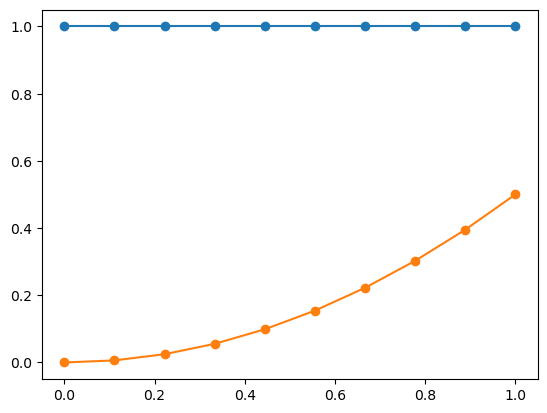

In [6]:
m = 8
h = 1/(m+1)

T = 1
x = np.linspace(0, T, m+2)
f = np.ones(m+2)
u_exact = x**2/2

plt.plot(x, f, '-o')
plt.plot(x, u_exact, '-o')

# (u_exact[2:] - 2*u_exact[1:-1] + u_exact[:-2])/h**2

Text(0.5, 1.0, '$\\log_{10}error$')

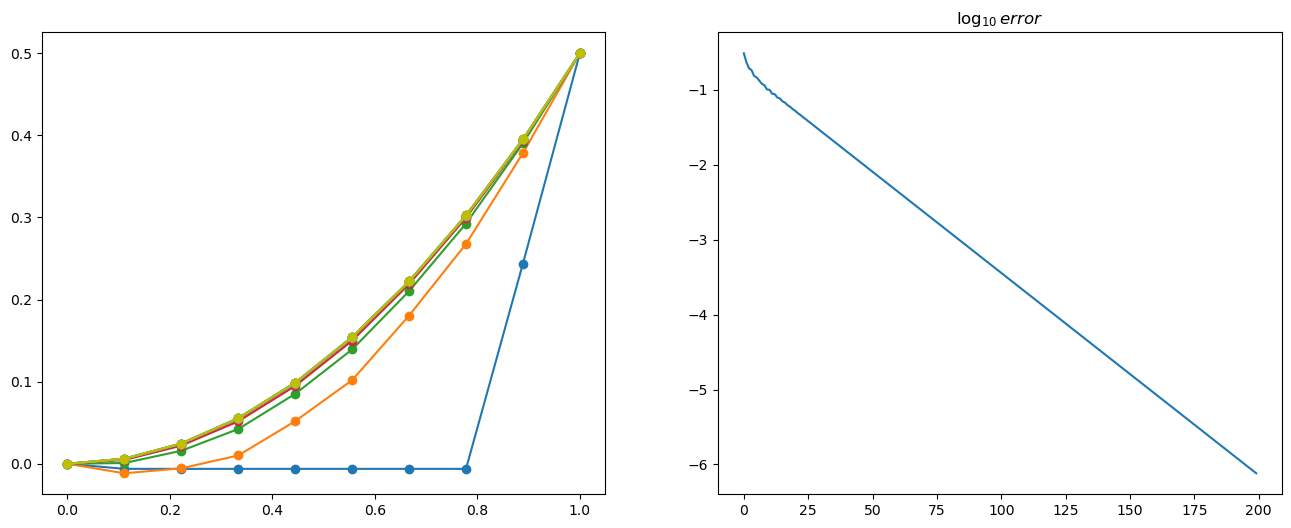

In [13]:
# jacobi
u = np.zeros(m+2)
u[0], u[-1] = 0, .5

epochs = 200
error = np.zeros(epochs)

plt.figure(figsize=(16, 6))

plt.subplot(121)
for i in range(epochs):
    u[1:-1] = 1/2*(u[:-2] + u[2:] - h**2*f[1:-1])
    error[i] = np.max(u_exact - u)
    if i%20 == 0:
        plt.plot(x, u, '-o')
plt.plot(x, u_exact, '-oy')


plt.subplot(122)
plt.plot(np.log10(error))
plt.title(r"$\log_{10}error$")



Text(0.5, 1.0, '$\\log_{10}error$')

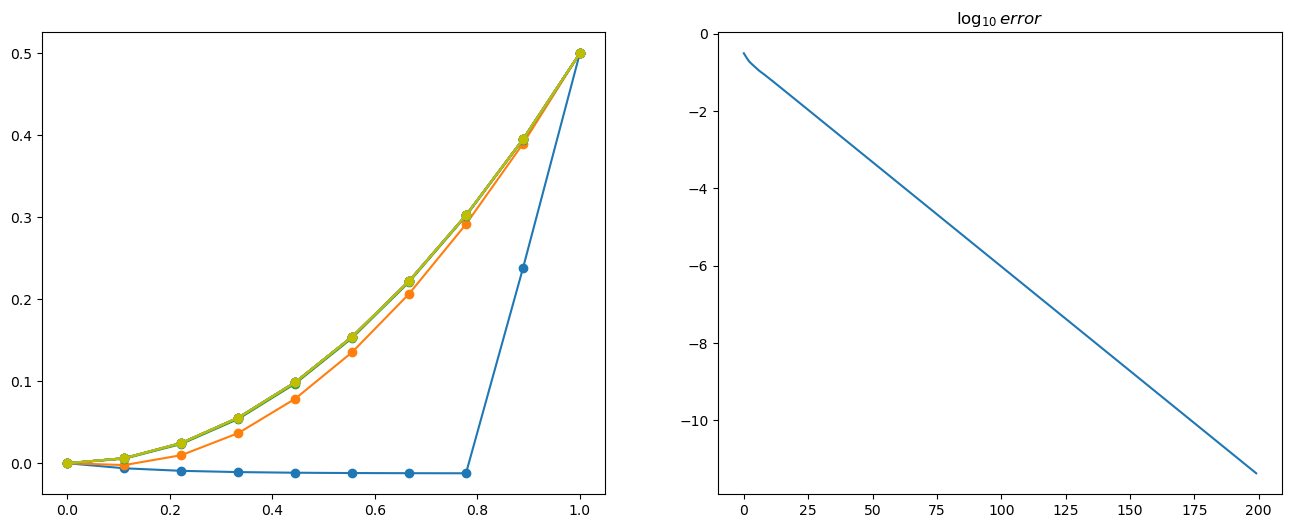

In [14]:
# Gauss-Seidel
u = np.zeros(m+2)
u[0], u[-1] = 0, .5

epochs = 200
error = np.zeros(epochs)

plt.figure(figsize=(16, 6))

plt.subplot(121)
for i in range(epochs):
    for j in range(1, m+1):
        u[j] = 1/2*(u[j-1] + u[j+1] - h**2*f[j])
    error[i] = np.max(u_exact - u)
    if i%20 == 0:
        plt.plot(x, u, '-o')
plt.plot(x, u_exact, '-oy')


plt.subplot(122)
plt.plot(np.log10(error))
plt.title(r"$\log_{10}error$")

